In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

# Input data files are available in the "../input/" directory.
from subprocess import check_output
# input_file = "../dataset_/no_imdb_names-count_cat-tf_184f.csv"
input_file = "../dataset_/movie_metadata.csv"

In [2]:
# Importing packages

import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline

In [3]:
f = pd.read_csv(input_file)
data=DataFrame(f)
data.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [4]:
### Explore the most important features
[ c for c in data.columns]

#data['imdb_score'].hist(bins=10)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

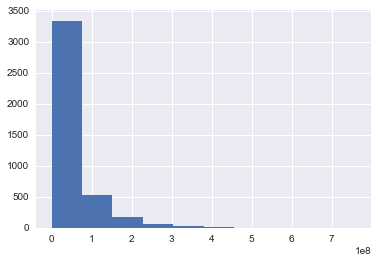

In [5]:
data['gross'].hist()

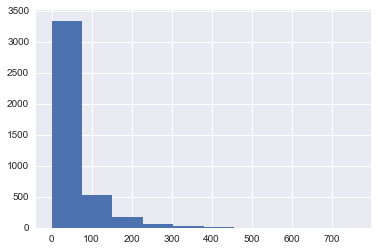

In [6]:
### Add posssibly usefull features

data['gross_millions'] = data['gross']/1E6
data['gross_millions'].hist()

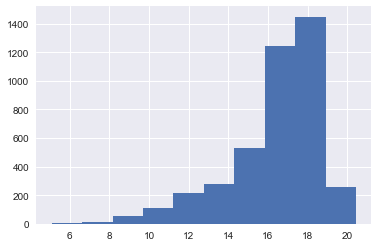

In [7]:
data['gross_log'] = np.log(data['gross'])
data['gross_log'].hist()

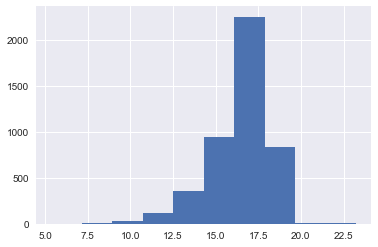

In [8]:
data['budget_log'] = np.log(data['budget'])
data['budget_log'].hist()  ## Consider applying log in the budget too as it has outlayers

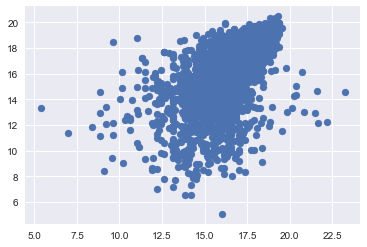

In [9]:
plt.scatter(data['budget_log'],data['gross_log'])
# This could be useful!

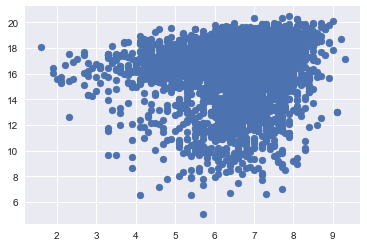

In [10]:
plt.scatter(data['imdb_score'],data['gross_log'])

In [11]:
### Clean data with NULL values

print( np.sum(data.isnull()) )
print( data.shape )
print( type(data) )

# Gross (the target variable) has the biggest number of null data
# Budget is the second worst variable
# Both are important

data_2 = data.dropna()
print( np.sum(data_2.isnull()) )
print( data_2.shape )
print( type(data_2) )

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
gross_millions               884
gross_log                    884
budget_log

In [12]:
### Save clean data
# data_2.to_csv(input_folder+'/movie_metadata_clean.csv')

In [20]:
### Use gross_classes
def discretize_gross(row):
    if row['gross'] < 1e7: return 1
    elif row['gross'] < 3e8: return 2
    else: return 3

data_2['gross_class'] = data_2.apply(discretize_gross, axis=1)
data_2['gross_class'].astype('category')

# How many movies per gross class?
grouped = data_2[['gross','gross_class']].groupby('gross_class')
print("Movies per gross class")
print(grouped.count())

Movies per gross class
             gross
gross_class       
1             1008
2             2686
3               62


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


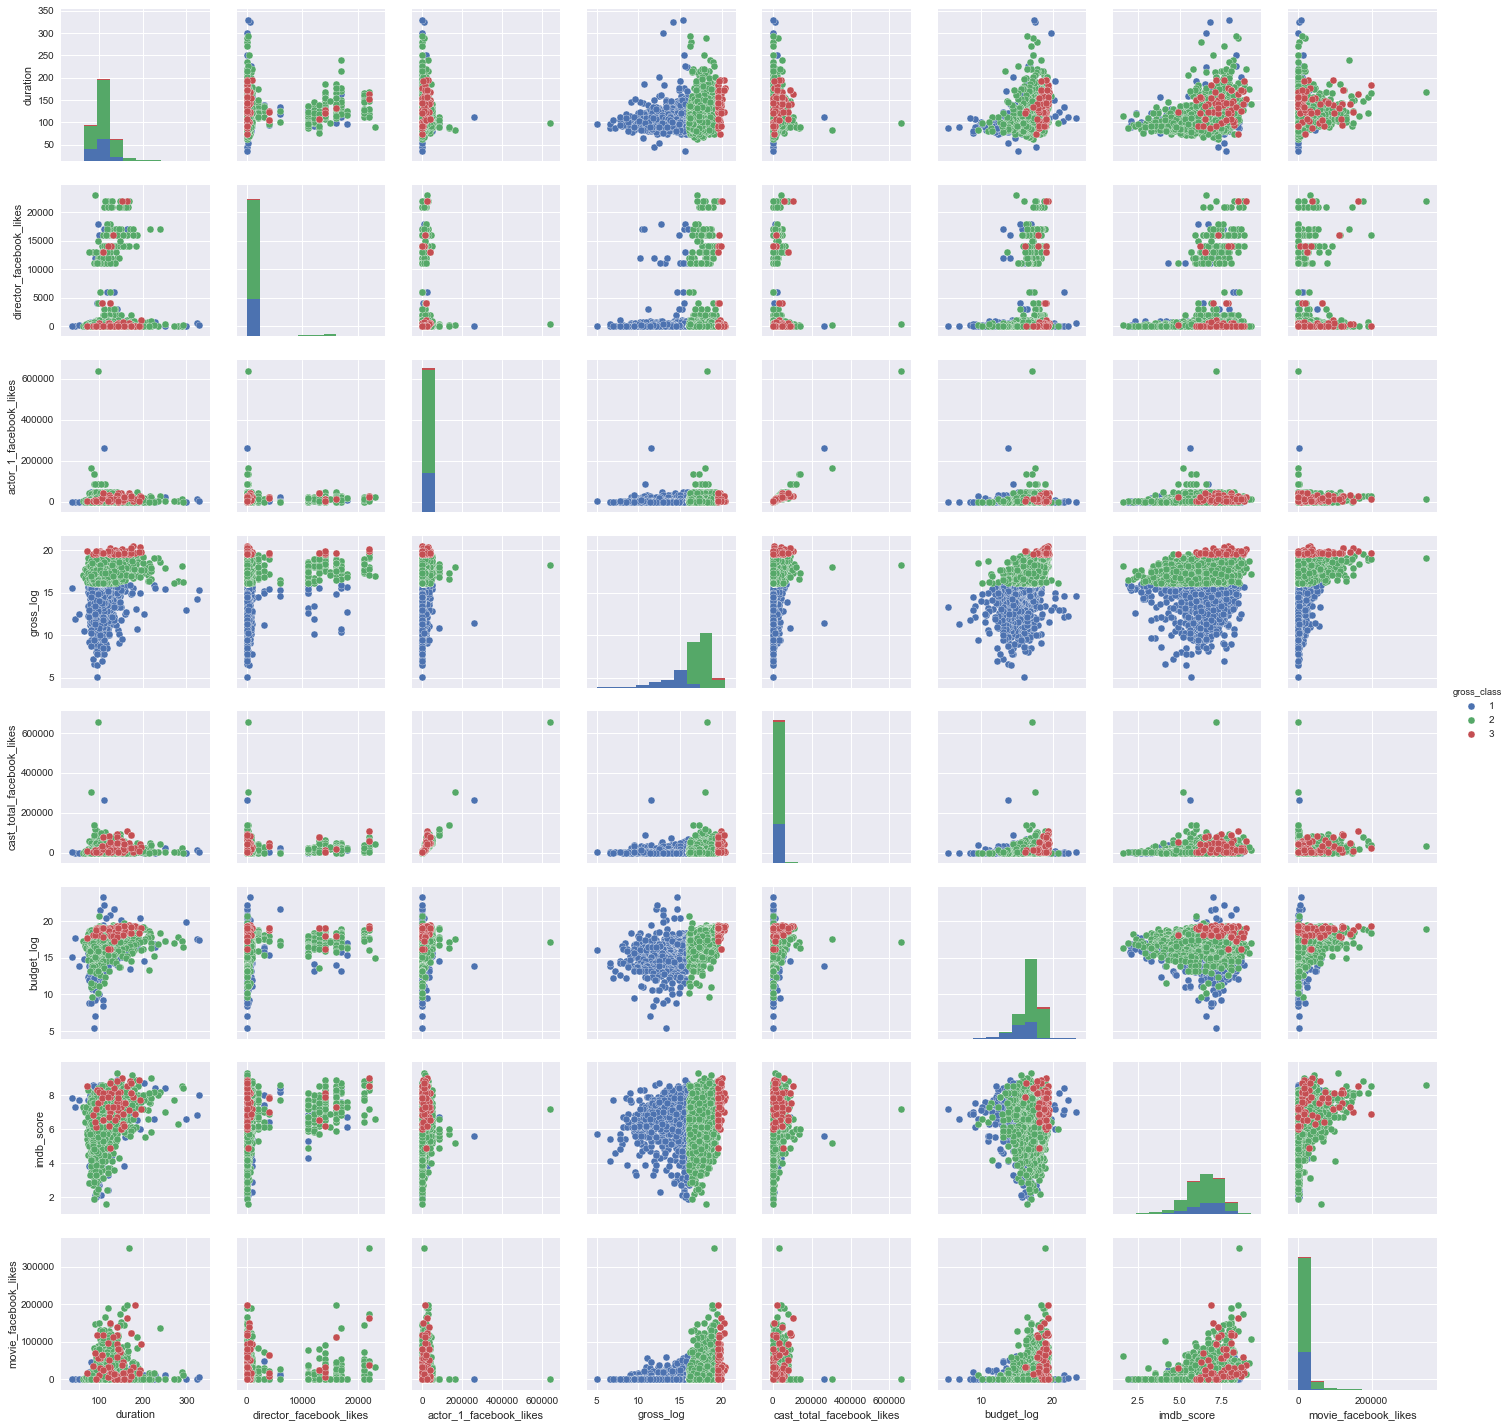

In [14]:
import seaborn as sns
sns.set()

relevant_features = ['duration', 'director_facebook_likes', 
                     'actor_1_facebook_likes', 
                     'gross_log', 'cast_total_facebook_likes',
                     'budget_log', 'imdb_score',
                     'movie_facebook_likes' 
                    ]

sns.pairplot(data_2, vars=relevant_features, hue='gross_class')

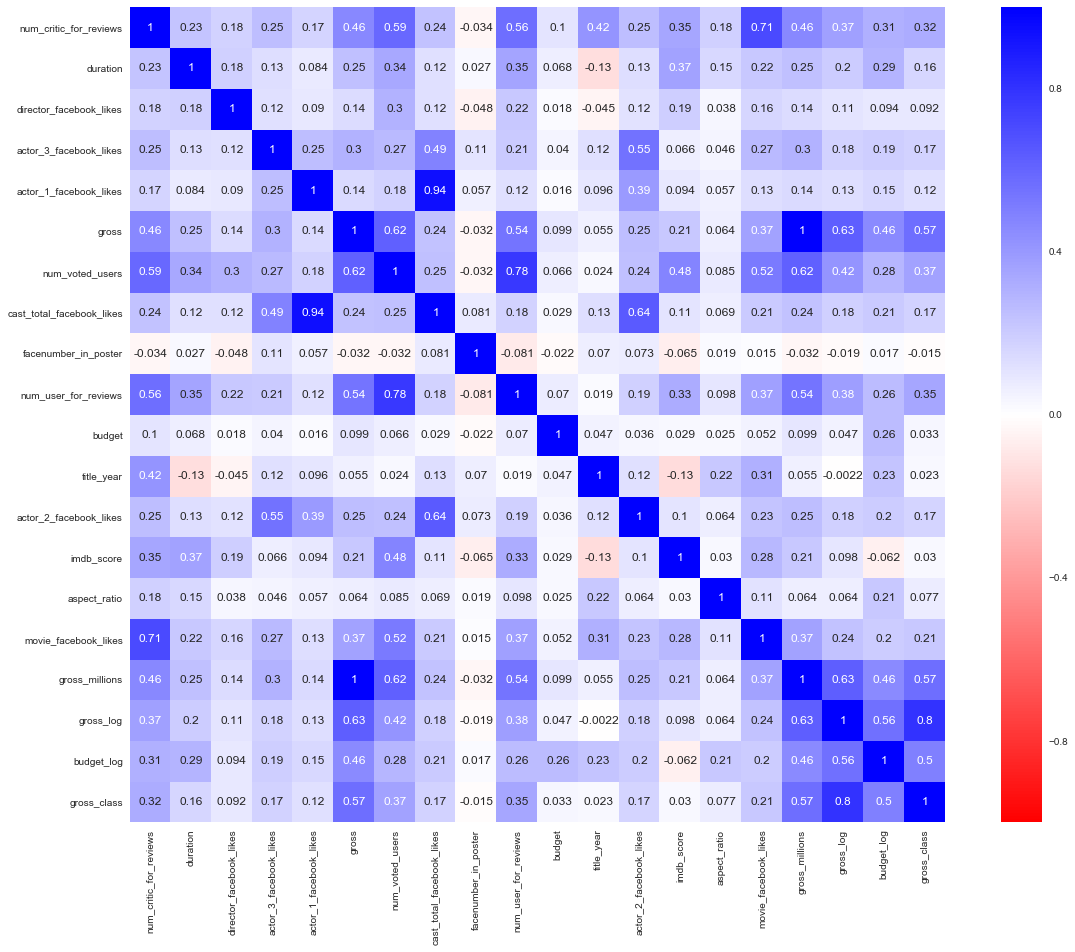

In [15]:
### Correlation matrix

corr_mat=data_2.corr(method='pearson')
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='bwr_r')

In [16]:
### Create a filter for numerical features
### Choose predictors

# Create an index for only numerical features
#index_filter_num_all=data_2.dtypes[data.dtypes!='object'].index
#print("Numerical features:")
#print(index_filter_num_all)

# This filter is used in the next steps for choosing the input features
predictors_name = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes']  # Remove target variables
print("Predictors:")
print(predictors_name)


# The target feature can be ONE of the following: 
targets_names = ['gross', 'gross_millions', 'gross_log']
print("Targets:")
print(targets_names)

# A list with preditors and targets: 
all_num_names = predictors_name + targets_names
print("All:")
print(all_num_names)


Predictors:
['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']
Targets:
['gross', 'gross_millions', 'gross_log']
All:
['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'gross', 'gross_millions', 'gross_log']


In [17]:
### Normalize data
### Set predictors
### Set target

X=StandardScaler().fit_transform(data_2[predictors_name])
y=np.array(data_2['gross'])

#X=data_2[predictors_name]
#y=data_2['gross_log']

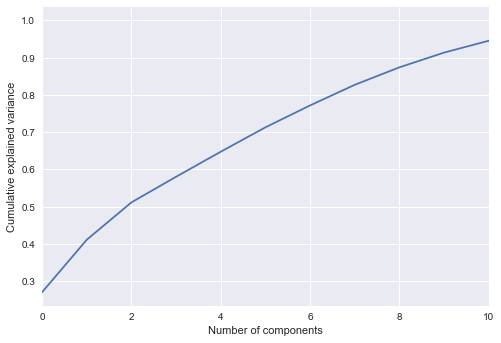

In [18]:
### Principal component analysis (PCA)

from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,10,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

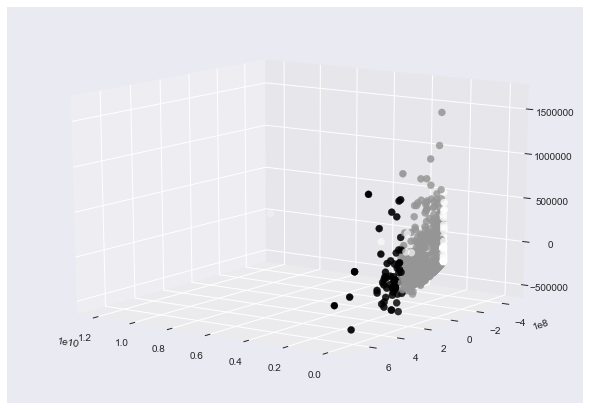

In [19]:
# 3D PCA-based plot

from mpl_toolkits.mplot3d import Axes3D

def create_2d_plot(data_2d, labels):
    plt.figure()
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels)

def create_3d_plot(data_3d, labels):
    fig = plt.figure()
    plt.clf()
    ax = Axes3D(fig, elev=15, azim=125)
    plt.cla()
    ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], 'o', s=50, c=labels)
    plt.show()


# 3D-plot
data_3d = PCA(n_components=3).fit_transform(data_2[predictors_name+targets_names])
create_3d_plot(data_3d, data_2['gross_class'])
